In [1]:
# check current directory
import os
os.getcwd()

# change directory to where the data is
os.chdir('/home/uccacbo/CrystaLLM')
os.getcwd()

'/home/uccacbo/CrystaLLM'

In [39]:
!python bin/train.py --config=config/cif_extd_BG/finetune_head_BG.yaml

Using configuration:
out_dir: model_ckpts/pretrained_models/large_model_untouched
ckpt_out_dir: model_ckpts/finetuned_models/BG_head_test
eval_interval: 5
log_interval: 2
eval_iters_train: 2
eval_iters_val: 2
eval_only: false
always_save_checkpoint: false
init_from: resume
wandb_log: true
wandb_project: crystallm_CIF_BG_tests
wandb_run_name: BG_large_head
dataset: CIF_BG_proj/BG_large_tokens
gradient_accumulation_steps: 4
batch_size: 4
block_size: 1024
n_layer: 12
n_head: 12
n_embd: 1024
dropout: 0.1
bias: false
learning_rate: 0.0001
max_iters: 4
weight_decay: 0.1
beta1: 0.9
beta2: 0.99
grad_clip: 1.0
decay_lr: true
warmup_iters: 100
lr_decay_iters: 50
min_lr: 1.0e-05
device: cuda
dtype: bfloat16
compile: true
underrep_p: 0.0
validate: true
codecarbon: false
tracker_project: crystallm
metrics_dir: comp_metrics
LoRA_rank: 16
LoRA_alpha: 32
finetune_method: finetune_head
adaptation: base
sanity_check: true
test_size: 0.05
val_size: 0.05

Resuming from model_ckpts/pretrained_models/large_

In [41]:
!python bin/train.py --config=config/regression_BG/regression_BG_head.yaml

Using configuration:
out_dir: model_ckpts/pretrained_models/large_model_untouched
ckpt_out_dir: model_ckpts/regression_models/BG_head_test
eval_interval: 5
log_interval: 2
eval_iters_train: 2
eval_iters_val: 2
eval_only: false
always_save_checkpoint: false
init_from: resume
wandb_log: false
wandb_project: crystallm_regr_BG_tests
wandb_run_name: BG_head
dataset: CIF_BG_proj/table_MP_500_tokens.pkl.gz
gradient_accumulation_steps: 4
batch_size: 4
block_size: 1024
n_layer: 12
n_head: 12
n_embd: 1024
dropout: 0.1
bias: false
learning_rate: 0.0001
max_iters: 4
weight_decay: 0.1
beta1: 0.9
beta2: 0.99
grad_clip: 1.0
decay_lr: true
warmup_iters: 100
lr_decay_iters: 4
min_lr: 1.0e-05
device: cuda
dtype: bfloat16
compile: true
underrep_p: 0.0
validate: true
codecarbon: false
tracker_project: crystallm
metrics_dir: comp_metrics
LoRA_rank: 16
LoRA_alpha: 32
finetune_method: finetune_head
adaptation: regression
sanity_check: true
test_size: 0.05
val_size: 0.05

Resuming from model_ckpts/pretrained_

In [2]:
!python bin/regr_inference.py

Loaded test dataset with 13 samples.
Model configuration: {'out_dir': 'model_ckpts/pretrained_models/large_model_untouched', 'ckpt_out_dir': 'model_ckpts/regression_models/BG_head_test', 'eval_interval': 5, 'log_interval': 2, 'eval_iters_train': 2, 'eval_iters_val': 2, 'eval_only': False, 'always_save_checkpoint': False, 'init_from': 'resume', 'wandb_log': False, 'wandb_project': 'crystallm_regr_BG_tests', 'wandb_run_name': 'BG_head', 'dataset': 'CIF_BG_proj/table_MP_500_tokens.pkl.gz', 'gradient_accumulation_steps': 4, 'batch_size': 4, 'block_size': 1024, 'n_layer': 16, 'n_head': 16, 'n_embd': 1024, 'dropout': 0.1, 'bias': False, 'learning_rate': 0.0001, 'max_iters': 4, 'weight_decay': 0.1, 'beta1': 0.9, 'beta2': 0.99, 'grad_clip': 1.0, 'decay_lr': True, 'warmup_iters': 100, 'lr_decay_iters': 4, 'min_lr': 1e-05, 'device': 'cuda', 'dtype': 'bfloat16', 'compile': True, 'underrep_p': 0.0, 'validate': True, 'codecarbon': False, 'tracker_project': 'crystallm', 'metrics_dir': 'comp_metrics'

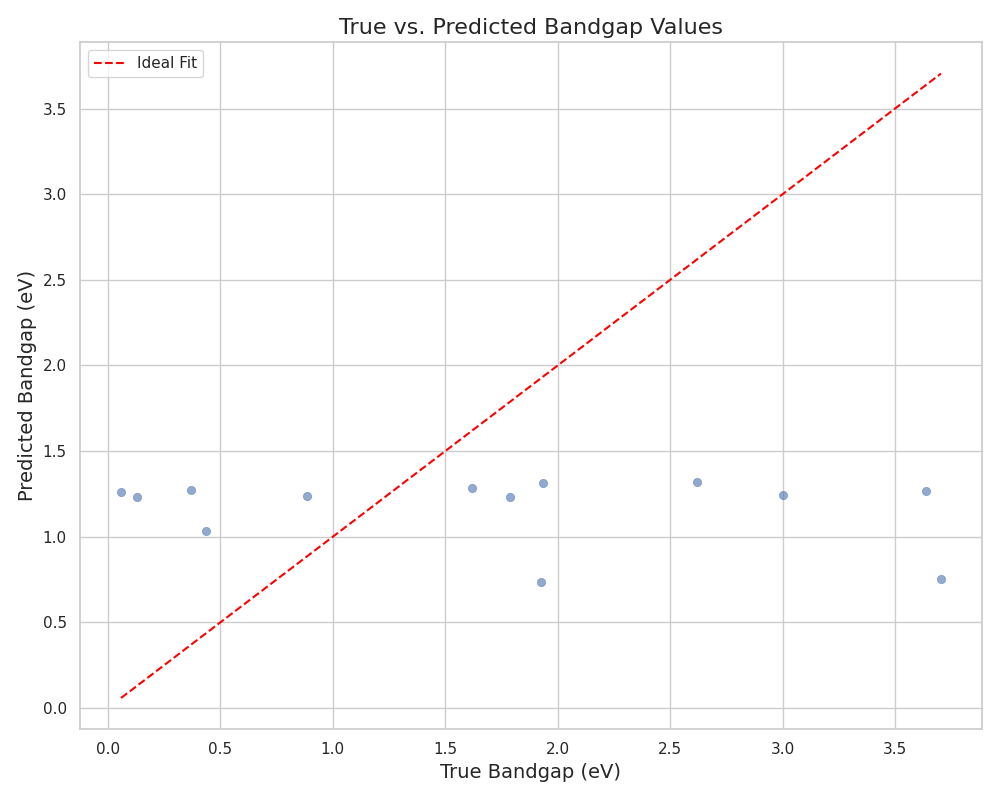

In [3]:
from IPython.display import Image, display

# Display the saved plot
display(Image(filename='true_vs_predicted_bandgap.png'))
